## Homework 1

## <em>Numerical Integration and ODE/PDEs</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em>

***
### Link Okpy

In [88]:
from client.api.notebook import Notebook
ok = Notebook('hw1_188.ok')
_ = ok.auth(inline = True)

Assignment: Homework 1
OK, version v1.12.5

Successfully logged in as ahashemi@berkeley.edu


***

### Imports

In [90]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

#### Gaussian Quadrature

The manual function for Gaussian quadrature integration.

In [91]:

def gaussxw(N):
    '''Calculate 'N' position and weights for Gaussian quadrature integration
    Returns a tuple of 2 arrays, the first array is the position of points and second
    array is the corresponding weights.
    '''
    a = np.linspace(3, 4*N -1, N)/(4*N+2)
    x = np.cos(np.pi*a + 1/(8*N*N*np.tan(a)))
    eps = 1e-15
    delta = 1.
    #calc roots
    while delta>eps:
        p0 = np.ones(N)
        p1 = np.copy(x)
        for k in range(1, N):
            p0, p1 = p1, ((2*k +1)*x*p1 -k*p0)/(k+1)
        dp = (N+1)*(p0 -x*p1)/(1-x**2)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
    
    #calc weights
    w = 2*(N+1)**2/(N*N*(1 - x**2)*dp**2)
    
    return x, w

def gaussxwab(N, a, b):
    '''Calculate 'N' position and weights for Gaussian quadrature integration
    between 'a' and 'b'
    Returns a tuple of 2 arrays, the first array is the position of points and second
    array is the corresponding weights.
    '''
    x, w = gaussxw(N)
    return 0.5*(b-a)*x + 0.5*(b+a), 0.5*(b-a)*w


#### Problem 1 - Harmonic Oscillator

The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$

<span style="color:blue"> Q1. Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude. </span>



In [92]:
m_prob1 = 1

def V(x):
    'Potential'
    
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    
    return (np.sqrt(8*m_prob1))*(1/(np.sqrt(V(a) - V(x))))


<span style="color:blue"> Q2. Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'? </span>

<span style="color:blue"> Q3. Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique) </span>

In [58]:
fixed_quad(np.cos, 0.0, np.pi/2, n=4)

(0.9999999771971152, None)

In [18]:
a = 2

n = 3077
tquadn = fixed_quad(lambda x: timep(x, a), 0.0, a, n=n)[0]
tquadn2 = fixed_quad(lambda x: timep(x, a), 0.0, a, n=2*n)[0]
print('Using fixed_quad: ')
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))

tquad = quad(lambda x: timep(x, a), 0.0, a)
print('Using quad: ')
print('Inbuilt Gaussian Quadrature gives time period = ', tquad[0], ' with error = ', tquad[1])

Using fixed_quad: 

For n = 3077, the time period is 1.854, with error = 1.000e-04
Using quad: 
Inbuilt Gaussian Quadrature gives time period =  1.8540746773017016  with error =  2.006794730391448e-10


#### Use the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) to use Romberg integration. 

<span style="color:blue"> Q4. A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? </span>



In [60]:

#will give nan, singularity at right end (when x = a =2)
romberg(lambda x: timep(x, a), 0.0, a)


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/srv/app/venv/lib/python3.6/site-packages/scipy/integrate/quadrature.py:651: RuntimeWarning: invalid value encountered in double_scalars
  return (tmp * c - b)/(tmp - 1.0)
/srv/app/venv/lib/python3.6/site-packages/scipy/integrate/quadrature.py:784: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  AccuracyWarning)


nan

Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position.

<span style="color:blue"> Q5. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10. Show your calculation and compare it with the python warning.</span>

In [61]:
gaussian_test = lambda x: 1/np.sqrt(np.pi) * np.exp(-x**2)

In [62]:
#here I made the singularity substitution as our upper bound will give division by 0 error (singularity at upper bound)
def timep2(x, a):
    return (2*np.sqrt(8*m_prob1) * x) / (np.sqrt((a**4) - (a - x**2)**4))

#still need to apply a tolerance of 1E-5 since now, the new form has a lower bound has singularity.
romberg(lambda x: timep2(x, a), 0.0 + 1E-5, np.sqrt(a), show=True, divmax=10)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f0a00df47b8> from [1e-05, 1.4142135623730951]

 Steps  StepSize   Results
     1  1.414204  2.121305 
     2  0.707102  1.915885  1.847411 
     4  0.353551  1.868863  1.853189  1.853574 
     8  0.176775  1.857748  1.854044  1.854101  1.854109 
    16  0.088388  1.854985  1.854064  1.854066  1.854065  1.854065 
    32  0.044194  1.854295  1.854065  1.854065  1.854065  1.854065  1.854065 
    64  0.022097  1.854122  1.854065  1.854065  1.854065  1.854065  1.854065  1.854065 

The final result is 1.8540646770284022 after 65 function evaluations.


1.8540646770284022

<span style="color:blue"> Q6. Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions. </span>


In [63]:
romberg(lambda x: timep2(x, a), 0.0 + 1E-5, np.sqrt(a), show=True, divmax=15)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f0a012d32f0> from [1e-05, 1.4142135623730951]

 Steps  StepSize   Results
     1  1.414204  2.121305 
     2  0.707102  1.915885  1.847411 
     4  0.353551  1.868863  1.853189  1.853574 
     8  0.176775  1.857748  1.854044  1.854101  1.854109 
    16  0.088388  1.854985  1.854064  1.854066  1.854065  1.854065 
    32  0.044194  1.854295  1.854065  1.854065  1.854065  1.854065  1.854065 
    64  0.022097  1.854122  1.854065  1.854065  1.854065  1.854065  1.854065  1.854065 

The final result is 1.8540646770284022 after 65 function evaluations.


1.8540646770284022

<span style="color:blue"> Q7. Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.  </span>

In [33]:
quad(lambda x: timep(x, a), 0, 0.2)[0]

0.14142277050980087

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  """


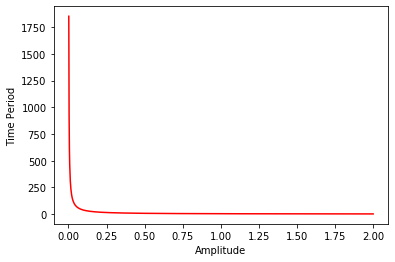

In [34]:

# def romb_func(q):
#     #try quad
#     return romberg(lambda x: timep2(x, a), 0.0+1E-5, q**0.5, divmax=15, tol=1E-5)
a_vals = np.linspace(0,2,1000)
f_vals = [quad(lambda x: timep(x, q), 0, q)[0] for q in a_vals]
#f_vals = [romb_func(x) for x in a_vals]
#Draw Figure here    
plt.plot(a_vals,f_vals, color='red')
plt.xlabel('Amplitude')
plt.ylabel('Time Period')
plt.show()


***

#### Problem 2 - Black Body Radiation

The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$

<span style="color:blue"> Q1. Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? </span>


#### Hint

The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$

In [65]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'
    
    return prefactor*(((z**3)*(1-z)**-5)/(np.exp(z*(1-z)**-1) - 1))


According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$

<span style="color:blue"> Q2. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral. How accurate you think the answer is? </span>


In [66]:
q2ans = fixed_quad(lambda z: blackbody_var(z), 0, 1, n=30)[0]
print(q2ans)
print("The accuracy is okay, but can be improved. The relative error between our calculated value and the literature is {:.3f}%".
     format(100*abs(q2ans - stfconst)/stfconst))



5.6627107708062256e-08
The accuracy is okay, but can be improved. The relative error between our calculated value and the literature is 0.135%



<span style="color:blue"> Q3. Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer. </span>

In [67]:
def blackbody(x):
    'Blackbody Spectrum (without the change of variable)'
    return prefactor*((x**3)/(np.exp(x) - 1))

q3ans = quad(lambda x: blackbody(x), 0, np.inf)[0]
print(q3ans)
print("The answer is almost identical. The difference between quad and fixed_quad is: {}".format(abs(q2ans - q3ans)))

5.6627031974081604e-08
The answer is almost identical. The difference between quad and fixed_quad is: 7.573398065167114e-14


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


***

#### Problem 3 - Gravitational Pull of Uniform Sheet

The gravitational force due to a plate felt by a point mass of 1 kg a distnace $z$ from the center of the square in the direction perpendicular to the sheet is given by 
$$ F_z = G \sigma z \int \int_{-L/2}^{L/2} \frac{dx dy}{(x^2 + y^2 + z^2)^{3/2}}$$
where $G = 6.674 \times 10 ^{-11} m^3 kg^{-1} s^{-2}$ and $\sigma$ is the mass per unit area. <br>

<span style="color:blue"> Q1. Write a program to calcualte and plot the force as a function of $z$ from $z=0$ to $z=10$ for a sheet of 10 metric tonnes and the sheet is $10\ m$ on side. Use Gaussian quadrature for the double integral. Though there is a 'dblquad' routine in python, we will make use of the manual functions defined above ("gaussxwab"). Study how the number of integration points 'N' affects the integral here. (Try N = 500 and N = 1000 and compare results: i.e. plot $F_z$ vs. $z$)</span>

In [77]:
np.zeros_like(np.logspace(-2, 1, 100))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
#simplest is for loop, but very slow
#idea is 1 loop, force(x, y, z) -> gaussian quadrature. 
# have x[] and y[] (all 1d) x = x.reshape(1,-1) makes this x a 2d array (x1, x2, ...) dim: N
#y = y.reshape(-1, 1) (column array) dim: 1
# python will automatically? do broadcasting. make (y1 y1 y1 .. ) N X N matrix
#                                                  y2 y2y2 ..  ) 

def force(x, y, z):
    'Write the functional form of force here'
    return G*sigma*z*((x**2) + (y**2) + (z**2))**(-3/2)
    
#Factors

G = 6.674E-11
M = 1e4
L = 10.
sigma = M / (L**2)

#x, y arrays?

#points in z direction
zz = np.logspace(-2, 1, 100)
f, f2 = np.zeros_like(zz), np.zeros_like(zz)

#Number of points for the integral defining
#points in x,y direction

N1 = 500
xx1, w1 = gaussxwab(N1, -L/2, L/2)

muhfunc = np.array([])
x = xx1
y = xx1
x = x.reshape(1, -1)
y = y.reshape(-1, 1)
for z in zz:
    theNN = w1*force(x, y, z)
    rowreduced = np.sum(theNN, axis = 1)
    columnreduced = sum(w1*rowreduced)
    muhfunc = np.append(muhfunc, columnreduced)

N2 = 1000
xx2, w2 = gaussxwab(N2, -L/2, L/2)
muhfunc2 = np.array([])
x2 = xx2
y2 = xx2
x2 = x2.reshape(1, -1)
y2 = y2.reshape(-1, 1)
for z in zz:
    theNN = w2*force(x2, y2, z)
    rowreduced = np.sum(theNN, axis = 1)
    columnreduced = sum(w2*rowreduced)
    muhfunc2 = np.append(muhfunc2, columnreduced)



# for foo in range(zz.size):
#     z = zz[foo]
#     for foo in range(zz.size):
#         y = zz[foo]
#         toappend = np.append(toappend, sum(w1*force(xx1, y, z)))
    
    
#     f[foo] = sum(w1*force(xx1, y, z))
# plt.plot(zz, f)
# N2 = 1000
# xx2, w2 = gaussxwab(N2, -L/2, L/2)

# for foo in range(zz.size):
#     ...
#     f2[foo] = 


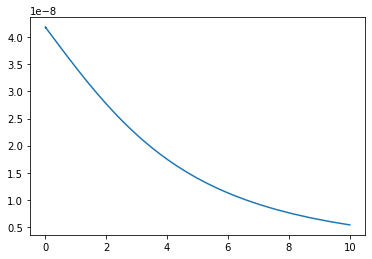

In [43]:
dblquadvals = [dblquad(lambda x, y: force(x, y, zval), -(L/2), (L/2), lambda x: -(L/2), lambda x: (L/2))[0] for zval in zz]
plt.plot(zz, dblquadvals)

##### Hint: 
The loop is supposed to calculate the double integral. <br>
To fill in the for loop, study what is returned by the 'gaussxwab' function and how do you use it to evaluate the integral. The easiest thing that can possibly be done is write a triple for loop. <br>
However for loops are quite slow in python. You should be able to reduce it to a double loop by using inbuilt functions on numpy array. Take inspiration from here https://docs.scipy.org/doc/numpy/reference/routines.math.html <br>
The next way to avoid loops in python is use [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and/or use of numpy.einsum. Though you are not required to use it here, its nevertheless a handy thing to know about and this problem is one of the simplest cases where you can use it. You will not need to add any new loops inside the one given (though you may need to declare new variables), and it should be faster than both 2 and 3 for loops.

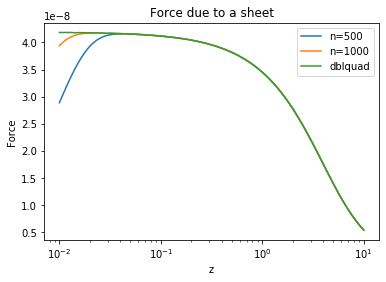

In [87]:
#Make plot
fig, ax = plt.subplots(1, 1)
ax.plot(zz, muhfunc, label = 'n=500')
ax.plot(zz, muhfunc2, label = 'n=1000')
ax.plot(zz, dblquadvals, label = 'dblquad')
ax.legend(loc = 0)
ax.set_xlabel('z')
ax.set_ylabel('Force')
ax.set_xscale('log')
ax.set_title("Force due to a sheet")
plt.show()

***

#### Problem 4 - Planetary Orbit Integration

One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.

![alt text](elliptical_orbit.png "Title")

Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.

<span style="color:blue"> Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$. </span>

Hint:

$$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

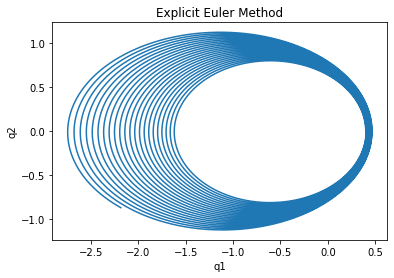

In [51]:
iters = 400000
e = 0.6
q1_0 = 1-e
q2_0 = 0
p1_0 = 0
p2_0 = np.sqrt((1+e)/(1-e))

def a_1(q1, q2):
    d = ((q1**2) + (q2**2))**(3/2)
    return -(q1/d)

def a_2(q1, q2):
    d = ((q1**2) + (q2**2))**(3/2)
    return -(q2/d)

time = np.linspace((200/iters), 200, iters)

q1arr = np.array([q1_0])
q2arr = np.array([q2_0])
p1arr = np.array([p1_0])
p2arr = np.array([p2_0])
# accels1 = np.array([])
# accels2 = np.array([])

for t in time:
    tau = 200/iters
    q1_curr = q1arr[-1]
    q2_curr = q2arr[-1]
    p1_curr = p1arr[-1]
    p2_curr = p2arr[-1]
    #print("it starts here", q1_curr, q2_curr, p1_curr, p2_curr)
    
    newq1 = q1_curr + tau*(p1_curr)
    newp1 = p1_curr + tau*a_1(q1_curr, q2_curr)
    newq2 = q2_curr + tau*(p2_curr)
    newp2 = p2_curr + tau*a_2(q1_curr, q2_curr)
    
#     accels1 = np.append(accels1, a_1(q1_curr, q2_curr))
#     accels2 = np.append(accels2, a_2(q1_curr, q2_curr))
    
    q1arr = np.append(q1arr, newq1)
    q2arr = np.append(q2arr, newq2)
    p1arr = np.append(p1arr, newp1)
    p2arr = np.append(p2arr, newp2)

#plt.plot(q1arr, q2arr)
plt.plot(q1arr, q2arr);
plt.title("Explicit Euler Method");
plt.xlabel("q1");
plt.ylabel("q2");

<span style="color:blue"> Q2. Using 400000 steps, use the symplectic Euler method</span>

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 

<span style="color:blue"> Again plot the orbit of the planet. Compare your results in Q1 and Q2 by plotting both solutions in the same figure.</span>

/srv/app/venv/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/srv/app/venv/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


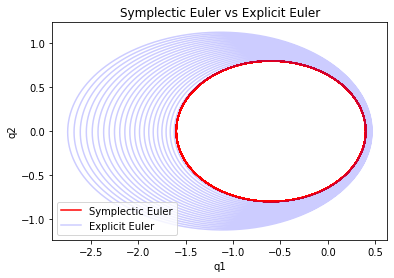

In [53]:
#possible typo: see https://piazza.com/class/jzu46e9hpuc2m9?cid=8

iters = 400000
e = 0.6
q1_0 = 1-e
q2_0 = 0
p1_0 = 0
p2_0 = np.sqrt((1+e)/(1-e))

def a_1(q1, q2):
    d = ((q1**2) + (q2**2))**(3/2)
    return -(q1/d)

def a_2(q1, q2):
    d = ((q1**2) + (q2**2))**(3/2)
    return -(q2/d)

time = np.linspace((200/iters), 200, iters)

part2_q1arr = np.array([q1_0])
part2_q2arr = np.array([q2_0])
part2_p1arr = np.array([p1_0])
part2_p2arr = np.array([p2_0])
# accels1 = np.array([])
# accels2 = np.array([])

for t in time:
    tau = 200/iters
    q1_curr = part2_q1arr[-1]
    q2_curr = part2_q2arr[-1]
    p1_curr = part2_p1arr[-1]
    p2_curr = part2_p2arr[-1]
    
    newq1 = q1_curr + tau*(p1_curr)
    newq2 = q2_curr + tau*(p2_curr)
    newp1 = p1_curr + tau*a_1(newq1, newq2)
    newp2 = p2_curr + tau*a_2(newq1, newq2)
    
    part2_q1arr = np.append(part2_q1arr, newq1)
    part2_q2arr = np.append(part2_q2arr, newq2)
    part2_p1arr = np.append(part2_p1arr, newp1)
    part2_p2arr = np.append(part2_p2arr, newp2)



plt.plot(part2_q1arr, part2_q2arr, color='red', label='Symplectic Euler');
plt.plot(q1arr, q2arr, color='blue', label='Explicit Euler', alpha=0.2);
plt.title("Symplectic Euler vs Explicit Euler");
plt.xlabel("q1");
plt.ylabel("q2");
plt.legend();

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 



In [ ]:
_ = ok.submit()


<IPython.core.display.Javascript object>